# Charts Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import rcParams
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker

v = (mpl.__version__)
print(f'Matplotlib Version: {v}')

print(mpl.get_configdir())
print(mpl.get_data_path())

Matplotlib Version: 3.6.3
C:\Users\awaul\.matplotlib
c:\Users\awaul\anaconda3\envs\mkd_py311\Lib\site-packages\matplotlib\mpl-data


In [2]:
# Set Theme

plt.style.use(['bmh','mystyle'])
#sns.set_palette("deep")


None


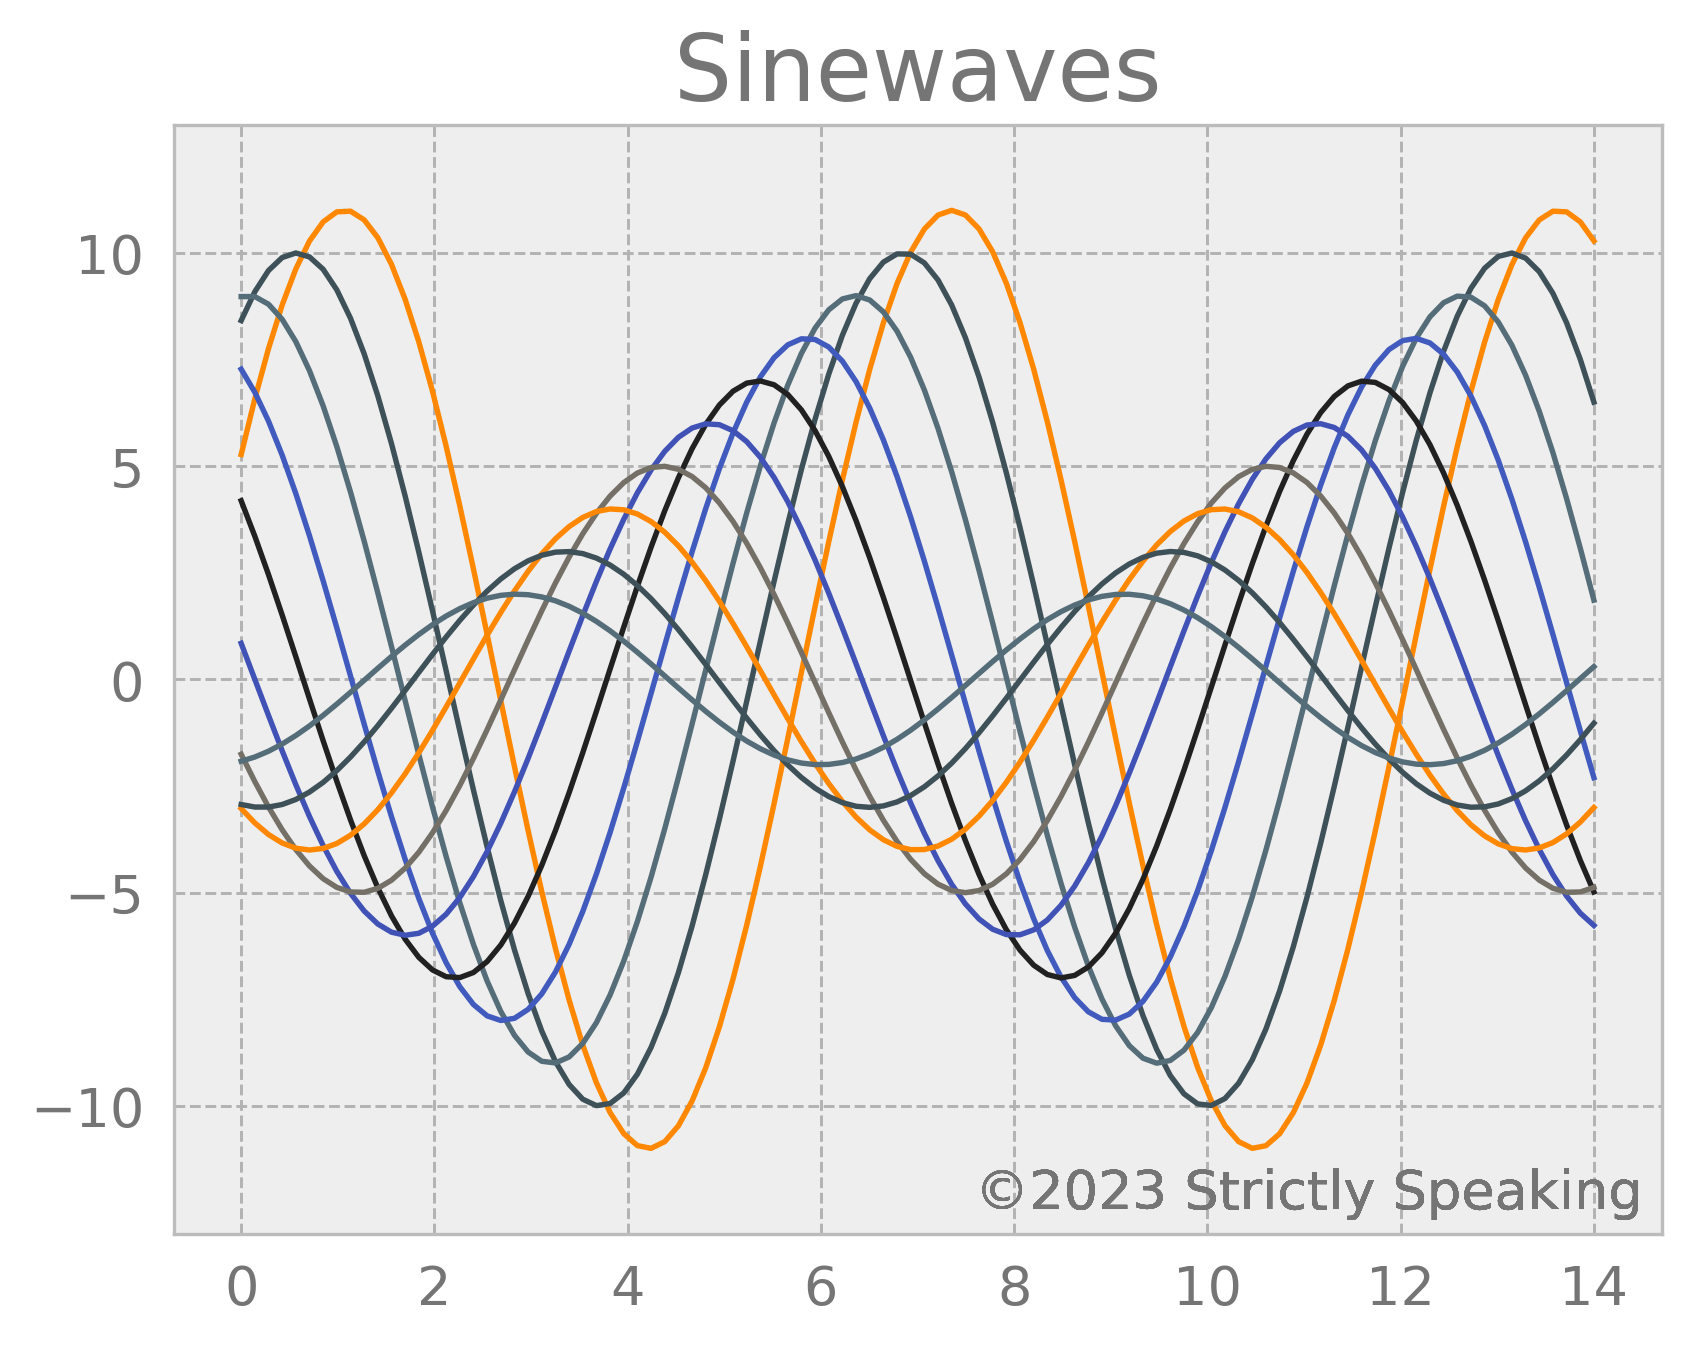

In [3]:
def sinplot(n=10, flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, n + 1):
        plt.plot(x, np.sin(x + i * .5) * (n + 2 - i) * flip)
        # Chart Title
        plt.title('Sinewaves') 
        # Set Y Limits
        plt.ylim(ymin=-13,ymax=13)
        # Create Watermark
        plt.figtext(x=0.89, y=0.12, s="©2023 Strictly Speaking", color='#757575', fontsize=13, 
        weight='ultralight', ha='right', va='bottom', transform=plt.gcf().transFigure) 
        
print(sinplot())

In [4]:
sns.plotting_context()

{'font.size': 10.0,
 'axes.labelsize': 'large',
 'axes.titlesize': 22.0,
 'xtick.labelsize': 13.0,
 'ytick.labelsize': 13.0,
 'legend.fontsize': 11.0,
 'legend.title_fontsize': None,
 'axes.linewidth': 0.8,
 'grid.linewidth': 0.7,
 'lines.linewidth': 1.3,
 'lines.markersize': 6.0,
 'patch.linewidth': 0.5,
 'xtick.major.width': 0.8,
 'ytick.major.width': 0.8,
 'xtick.minor.width': 0.6,
 'ytick.minor.width': 0.6,
 'xtick.major.size': 3.5,
 'ytick.major.size': 3.5,
 'xtick.minor.size': 2.0,
 'ytick.minor.size': 2.0}

## Import Data

### SP 500 Price Data

In [5]:
spx_data = pd.read_csv("../../data/spx.csv")
print(spx_data.tail(3))

         Date     Open     High      Low    Close
267  01/04/22  4804.51  4818.62  4774.27  4793.54
268  01/03/22  4778.14  4796.64  4758.17  4796.56
269  12/31/21  4775.21  4786.83  4765.75  4766.18


In [6]:
spx_data.info()
print('\n')
print(spx_data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    270 non-null    object 
 1    Open   270 non-null    float64
 2    High   270 non-null    float64
 3    Low    270 non-null    float64
 4    Close  270 non-null    float64
dtypes: float64(4), object(1)
memory usage: 10.7+ KB


Index(['Date', ' Open', ' High', ' Low', ' Close'], dtype='object')


### Housing Data

In [7]:
housing = pd.read_csv("../../data/housing.csv")
print(housing.head(3))

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   

  Alley Lot Shape Land Contour  ...  Fence Misc Feature Misc Val Mo Sold  \
0   NaN       IR1          Lvl  ...    NaN          NaN        0       5   
1   NaN       Reg          Lvl  ...  MnPrv          NaN        0       6   
2   NaN       IR1          Lvl  ...    NaN         Gar2    12500       6   

  Yr Sold Sale Type Sale Condition SalePrice           Year            Rooms  
0    2010       WD          Normal    215000  1999 or older  7 rooms or more  
1    2010       WD          Normal    105000  1999 or older  6 rooms or less  
2    2010       WD          Normal    172000  1999 or older  6 rooms or less  

[3 rows x 84 columns]


In [8]:
print(housing.columns)

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

## Clean Data

The SP 500 Pricing data requires a few modifications.


1) Remove the leading spaces within column names.

2) Change the date column from object type data to datetime data.

In [9]:
spx_data.rename(columns=lambda x: x.strip(), inplace=True)
print(spx_data.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')


In [10]:
spx_data['Date'] = pd.to_datetime(spx_data['Date'])
print(f'The data type is: {spx_data["Date"].dtype}')

The data type is: datetime64[ns]


## Build Charts

### S&P 500 Price Chart

[]

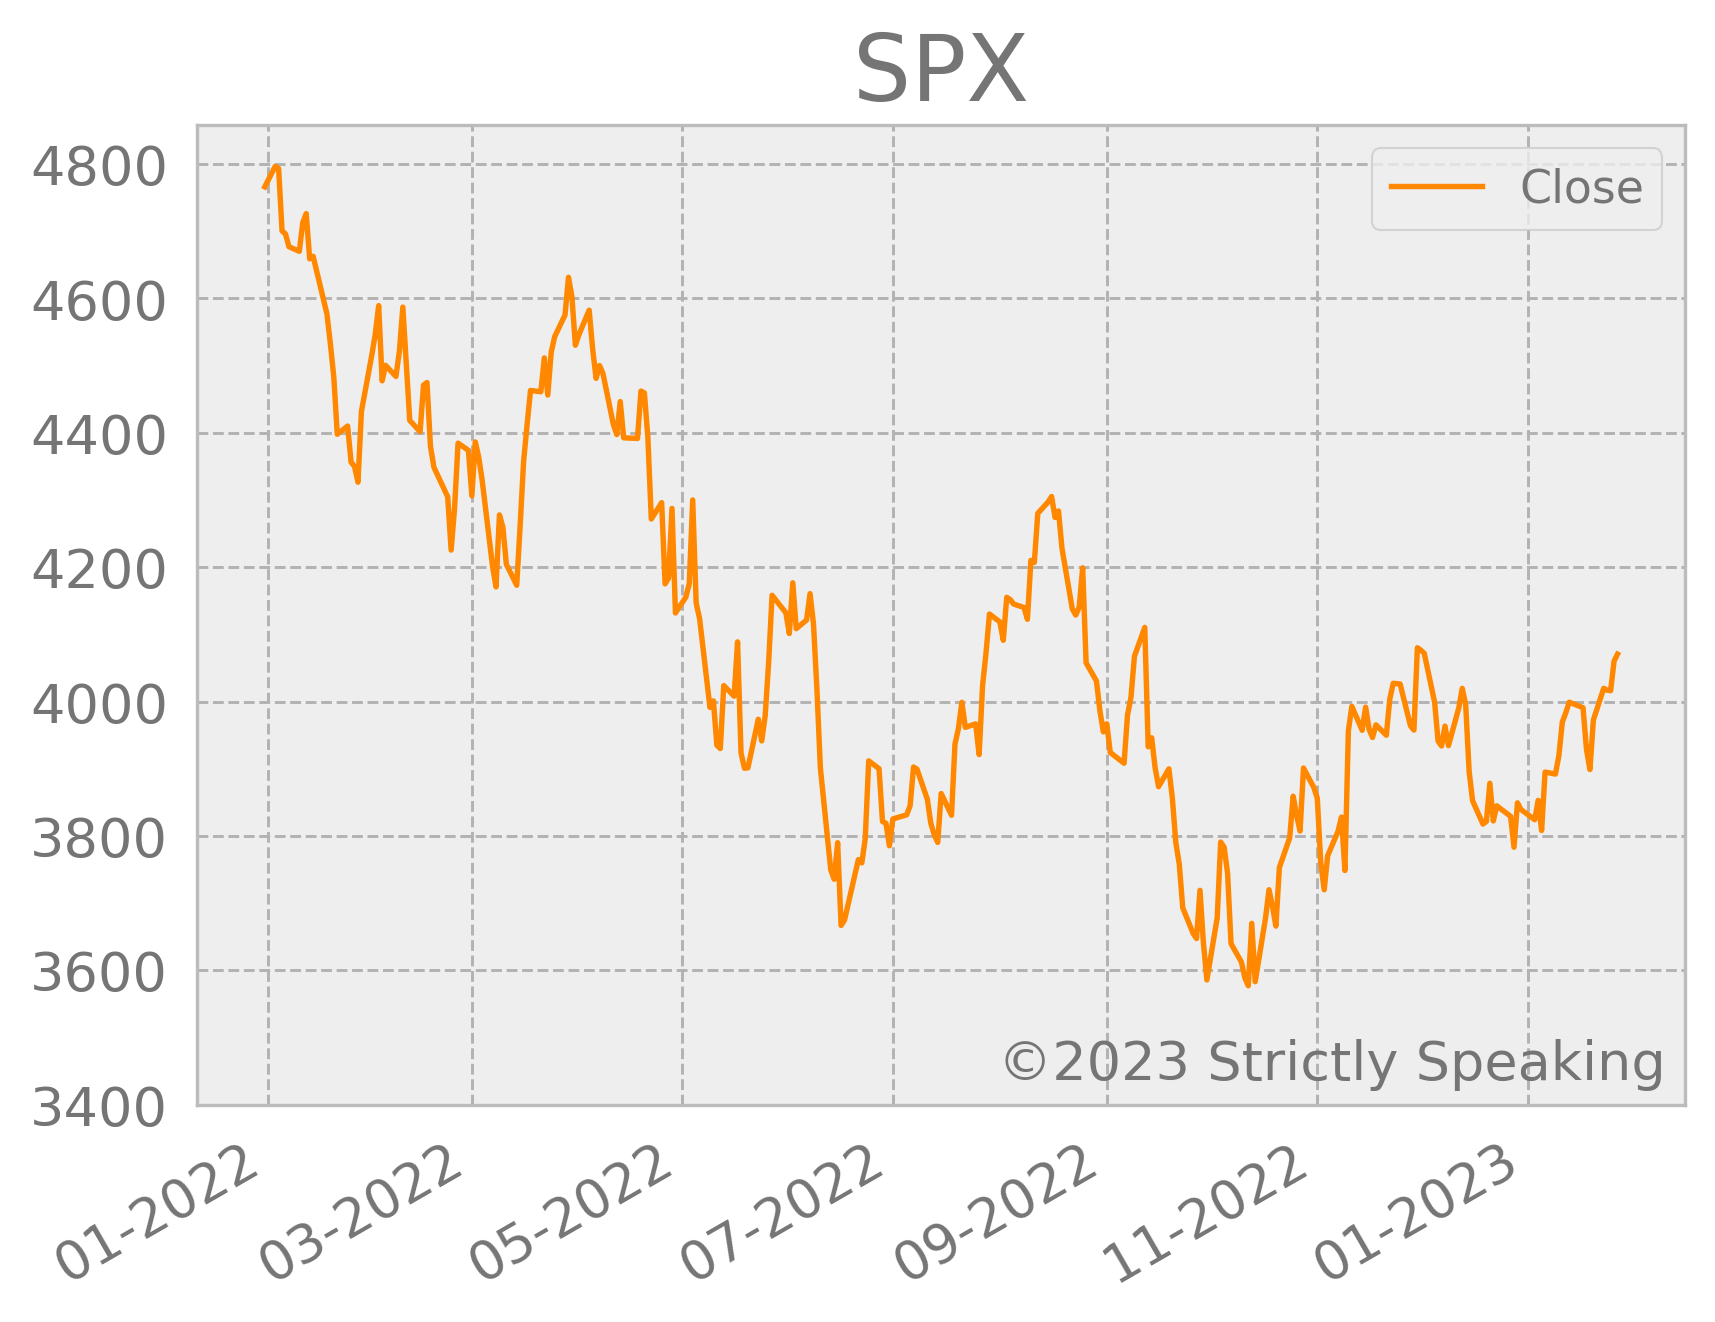

In [11]:
spx_data.plot.line('Date','Close')
plt.title('SPX')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.xlabel('') # Removes the label on x axis
#plt.xlim(xmin='12/31/21') 
plt.ylim(ymin=3400)
# Watermark
plt.figtext(x=0.89, y=0.21, s="©2023 Strictly Speaking", color='#757575', 
fontsize=13, weight='ultralight', ha='right', va='bottom',
transform=plt.gcf().transFigure)
plt.plot()

### Housing Charts

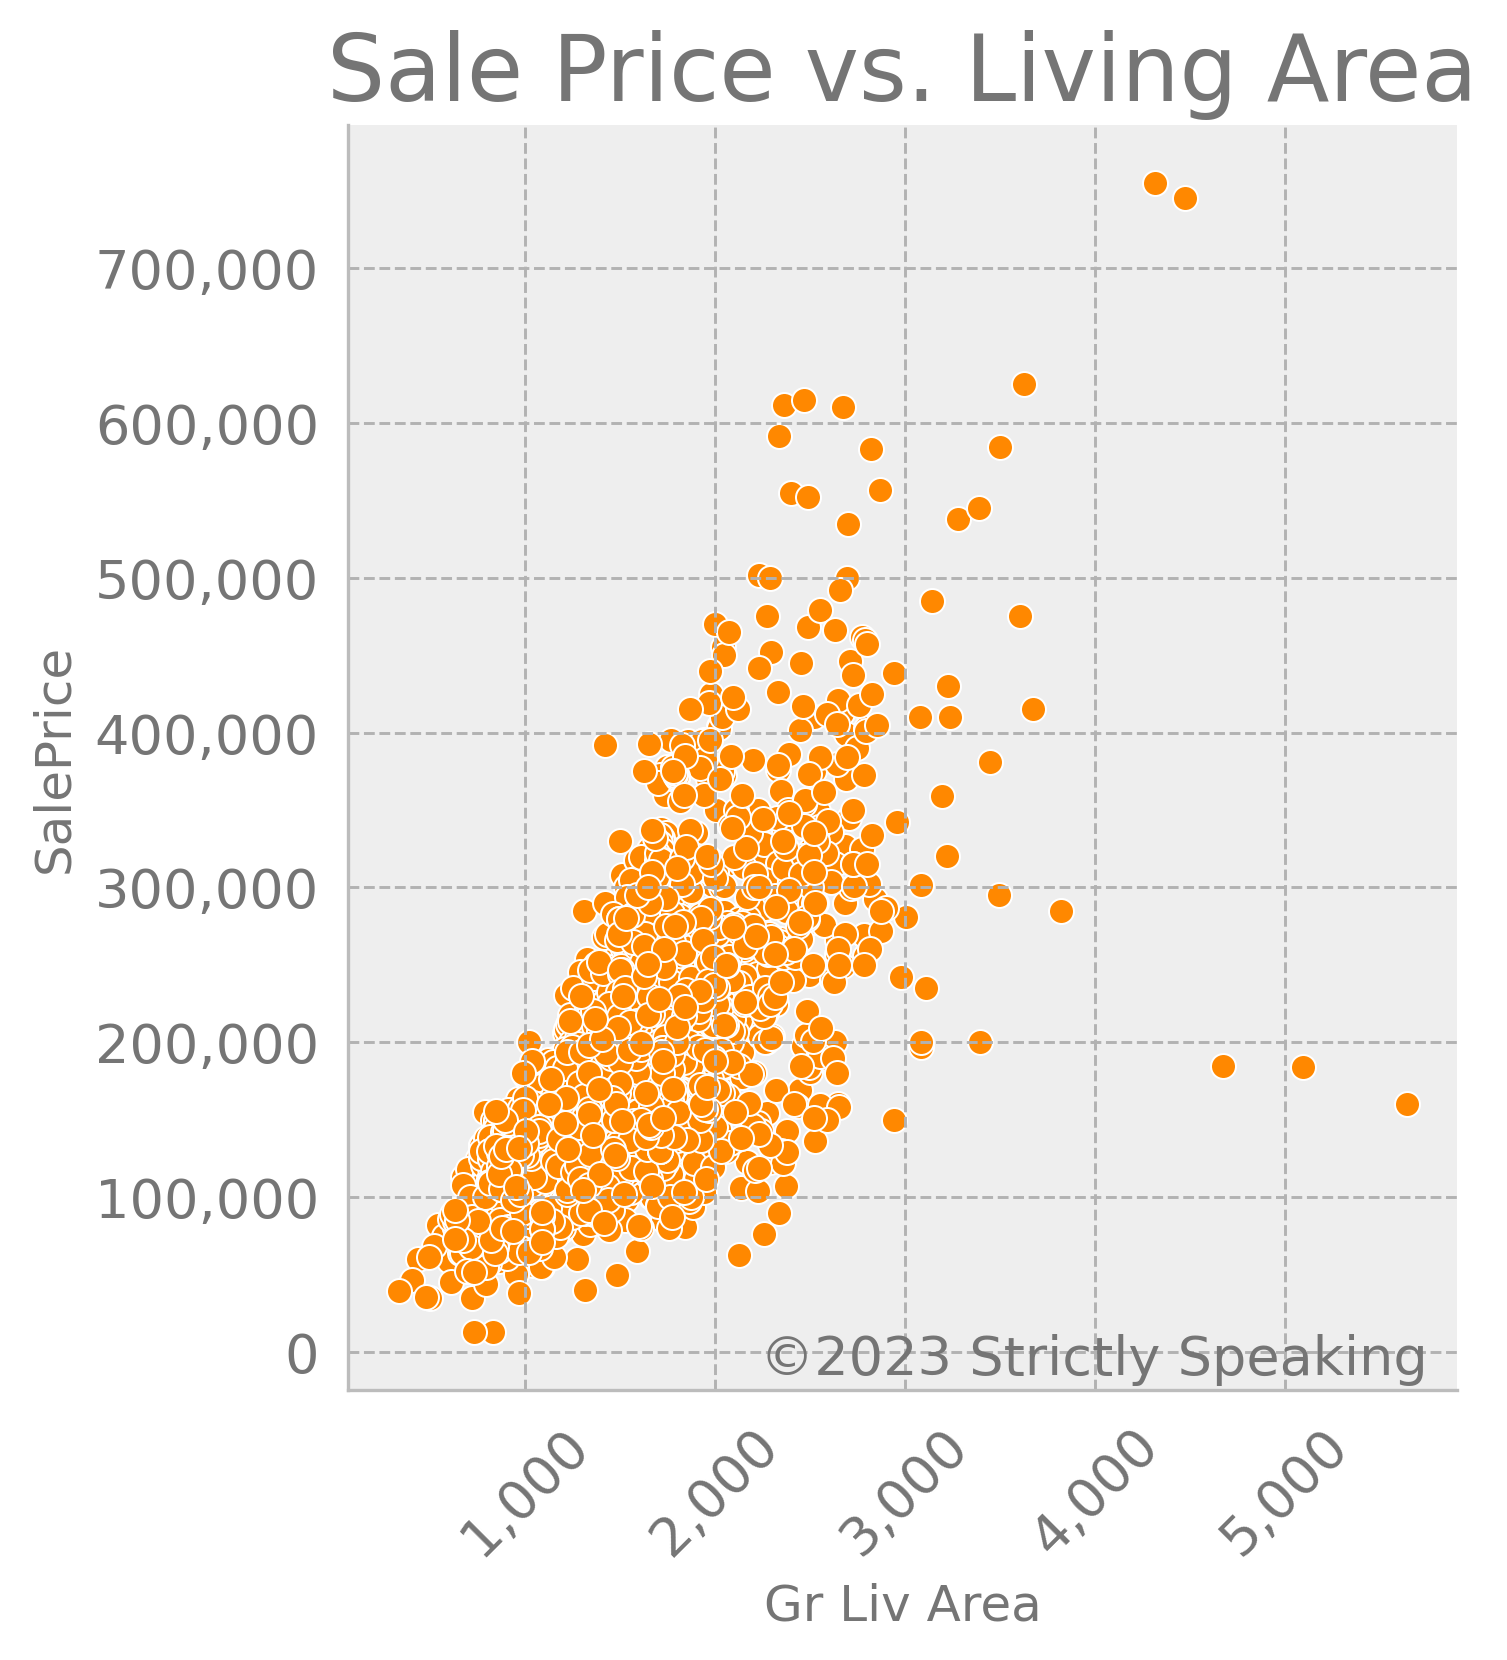

In [12]:
sns.relplot(data=housing, x = "Gr Liv Area", y = "SalePrice")
plt.title("Sale Price vs. Living Area")
ax = plt.gca() # Get Current Axis
formatter = ticker.StrMethodFormatter("{x:,.0f}")
ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45)
# Watermark
plt.figtext(x=0.95, y=0.13, s="©2023 Strictly Speaking", color='#757575', 
fontsize=13, weight='ultralight', ha='right', va='bottom',
transform=plt.gcf().transFigure)
plt.show()

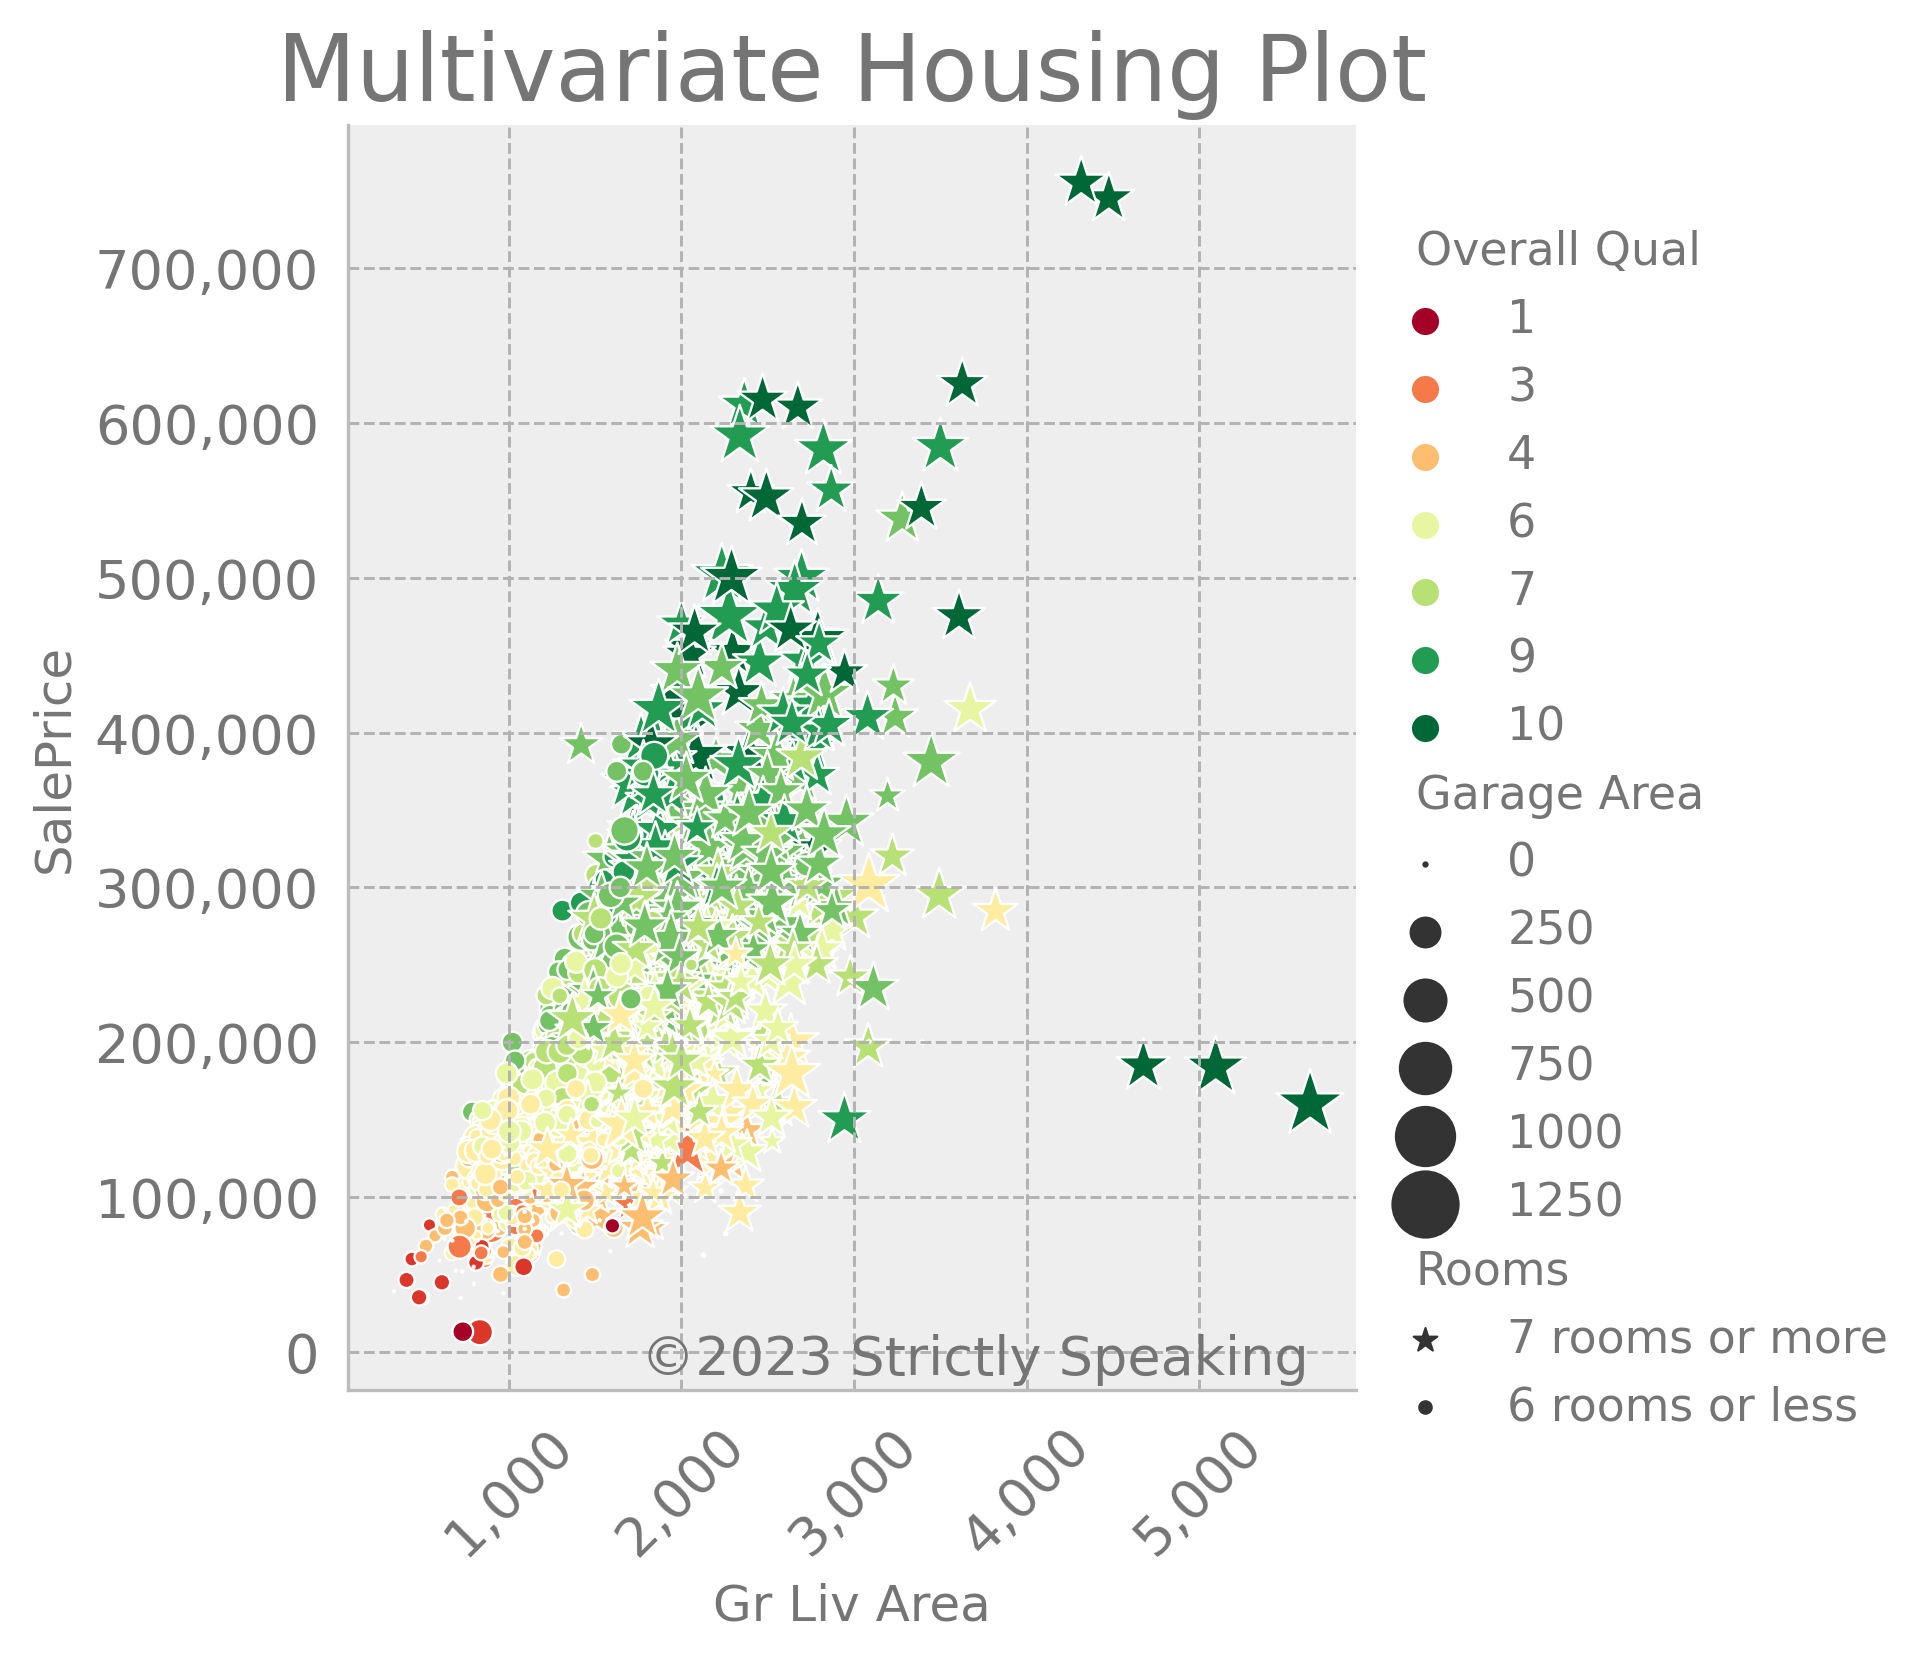

In [13]:
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlGn',
            size='Garage Area', sizes=(1,300),
            style='Rooms', markers=['*','.'])
plt.title("Multivariate Housing Plot")
ax = plt.gca() # Get Current Axis
formatter = ticker.StrMethodFormatter("{x:,.0f}")
ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(formatter)
# Watermark
plt.figtext(x=0.70, y=0.13, s="©2023 Strictly Speaking", color='#757575', 
fontsize=13, weight='ultralight', ha='right', va='bottom',
transform=plt.gcf().transFigure)
plt.xticks(rotation=45)
plt.show()

## Object Oriented Charting

More complex, but greater customization...


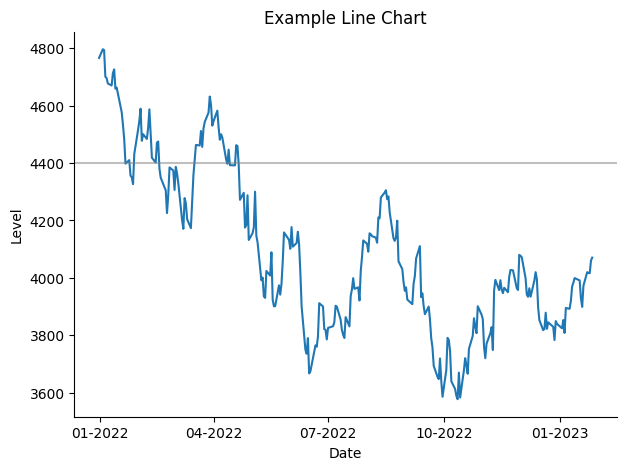

In [14]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(7,5))
    ax.plot(spx_data.Date,spx_data.Close)
    ax.set_title('Example Line Chart')
    ax.set_xlabel('Date')
    ax.set_ylabel('Level')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(bottom=True,left=True)
    ax.axhline(y=4400, c='grey',alpha=0.5)
plt.show()

In [15]:
sns.plotting_context()

{'font.size': 10.0,
 'axes.labelsize': 'large',
 'axes.titlesize': 22.0,
 'xtick.labelsize': 13.0,
 'ytick.labelsize': 13.0,
 'legend.fontsize': 11.0,
 'legend.title_fontsize': None,
 'axes.linewidth': 0.8,
 'grid.linewidth': 0.7,
 'lines.linewidth': 1.3,
 'lines.markersize': 6.0,
 'patch.linewidth': 0.5,
 'xtick.major.width': 0.8,
 'ytick.major.width': 0.8,
 'xtick.minor.width': 0.6,
 'ytick.minor.width': 0.6,
 'xtick.major.size': 3.5,
 'ytick.major.size': 3.5,
 'xtick.minor.size': 2.0,
 'ytick.minor.size': 2.0}